<a href="https://colab.research.google.com/github/TariqOuahmane/test_colab/blob/main/VaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas_datareader import data as wb

In [ ]:
ticker = ['^GSPC']
sp_data = pd.DataFrame()
sp_data= wb.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']

In [ ]:
returns=(sp_data/sp_data.shift(1))-1

In [ ]:
returns=np.array(returns.drop(returns.index[0]))

In [ ]:
x=np.linspace(-0.1,0.1,1000)
y=stats.norm.pdf(x=x,loc=returns.mean(),scale=returns.std())

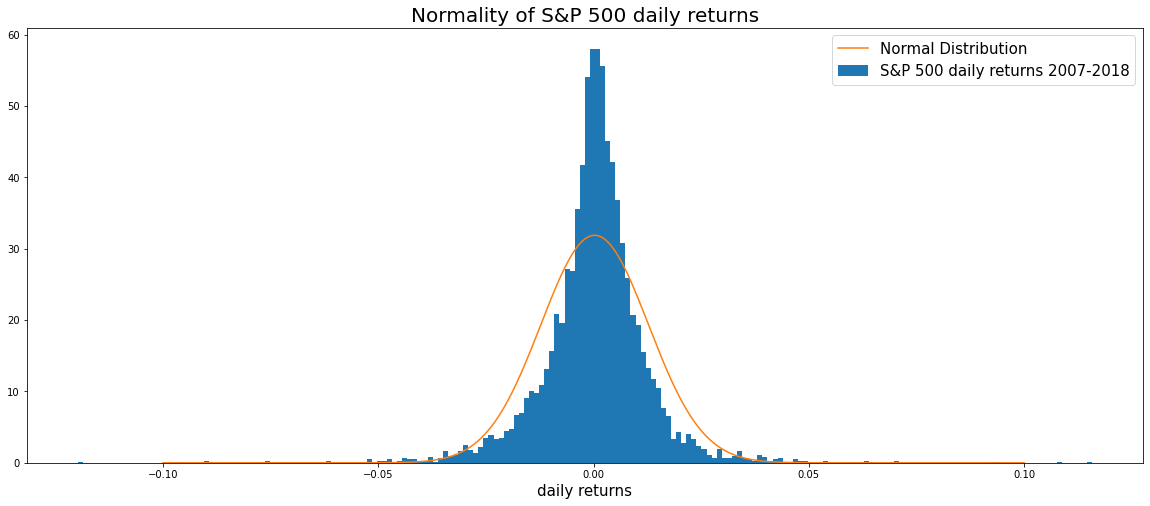

In [ ]:
plt.figure(figsize = (20, 8))
plt.hist(returns, density = True, bins = 200, label = "S&P 500 daily returns 2007-2018")
plt.plot(x, y, label = "Normal Distribution")
plt.title("Normality of S&P 500 daily returns", fontsize = 20)
plt.xlabel("daily returns",  fontsize = 15)
plt.legend(fontsize = 15)
plt.show()







### Value-at-Risk (VaR) - Parametric Method

The Investment Fund ABC currently has a __1,000,000 USD__ position in the __S&P 500 Index__. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on __historical data__ (and forecasts).<br><br>Calculate the __minimum loss__ over a __one-day period__ that will occur with __1%__ probability: __1% Value-at-Risk (VaR) of 1,000,000 USD over a one-day period__. Use the __parametric method__.

In [ ]:
I0=1000000
p=0.01

In [ ]:
mean=returns.mean()
std=returns.std()
(mean,std)

(0.0002597493821657769, 0.012514942735802165)

In [ ]:
VaR_p=stats.norm.ppf(q=p,loc=mean,scale=std)*I0
VaR_p

-28854.361045010453

In [ ]:
stats.norm.ppf?

### Value-at-Risk (VaR) - Historical Method

In [ ]:
VaR_h=np.percentile(returns,q=p*100)*I0
VaR_h

-34655.81230137425

### Monte Carlo Simulation - Parametric Method (Part 1)

In [ ]:
I0=100
size=int(252/4)

In [ ]:
ret=np.random.normal(loc=mean,scale=std,size=size)
ret

array([ 0.01116344,  0.01460103,  0.0218292 , -0.01583522,  0.00134466,
       -0.01350396,  0.01606197,  0.00790858,  0.01058218,  0.00035269,
       -0.01453298, -0.00947335,  0.00851536, -0.00246942,  0.00405089,
       -0.00870618,  0.01731136,  0.00029818,  0.02983923, -0.00763493,
        0.0028697 , -0.01757773,  0.01277503,  0.01386007,  0.02042097,
       -0.01000043,  0.00353673, -0.00813608, -0.00238397, -0.02264028,
        0.0344231 ,  0.00573559,  0.01556421,  0.00775541,  0.02129977,
        0.03494697, -0.00466406,  0.02489217, -0.00719422, -0.02415497,
       -0.01049805, -0.00010535, -0.00230588,  0.02431722,  0.01634195,
        0.00030402,  0.00861739,  0.01179575,  0.00762715,  0.00309136,
        0.00203543,  0.00075449, -0.00639288, -0.0100144 , -0.01436123,
        0.00706623,  0.01639836, -0.00760046,  0.00264057, -0.00011993,
       -0.00230607, -0.01736464, -0.00323575])

In [ ]:
path=(ret+1).cumprod()*I0
path

array([101.11634409, 102.59274651, 104.83226431, 103.17222238,
       103.31095412, 101.91584722, 103.55281627, 104.37177222,
       105.4762528 , 105.51345313, 103.98002798, 102.99498874,
       103.87202853, 103.61552449, 104.03525908, 103.12950938,
       104.91482145, 104.946105  , 108.07761634, 107.25245085,
       107.56023289, 105.66956814, 107.01949999, 108.50279726,
       110.71852968, 109.61129628, 109.99896198, 109.10400181,
       108.84390141, 106.37964473, 110.04156237, 110.67271579,
       112.39524963, 113.26692073, 115.67947963, 119.72212748,
       119.16373644, 122.12998069, 121.25135113, 118.32252797,
       117.0803718 , 117.06803742, 116.79809281, 119.63829813,
       121.59342152, 121.63038877, 122.67852511, 124.12560986,
       125.07233503, 125.45897912, 125.71434156, 125.80919121,
       125.00490822, 123.75305907, 121.97581233, 122.83772144,
       124.85205879, 123.90312629, 124.23030065, 124.21540219,
       123.92895314, 121.77697145, 121.38293116])

In [ ]:
path=np.insert(path,0,I0)
path

array([100.        , 101.11634409, 102.59274651, 104.83226431,
       103.17222238, 103.31095412, 101.91584722, 103.55281627,
       104.37177222, 105.4762528 , 105.51345313, 103.98002798,
       102.99498874, 103.87202853, 103.61552449, 104.03525908,
       103.12950938, 104.91482145, 104.946105  , 108.07761634,
       107.25245085, 107.56023289, 105.66956814, 107.01949999,
       108.50279726, 110.71852968, 109.61129628, 109.99896198,
       109.10400181, 108.84390141, 106.37964473, 110.04156237,
       110.67271579, 112.39524963, 113.26692073, 115.67947963,
       119.72212748, 119.16373644, 122.12998069, 121.25135113,
       118.32252797, 117.0803718 , 117.06803742, 116.79809281,
       119.63829813, 121.59342152, 121.63038877, 122.67852511,
       124.12560986, 125.07233503, 125.45897912, 125.71434156,
       125.80919121, 125.00490822, 123.75305907, 121.97581233,
       122.83772144, 124.85205879, 123.90312629, 124.23030065,
       124.21540219, 123.92895314, 121.77697145, 121.38

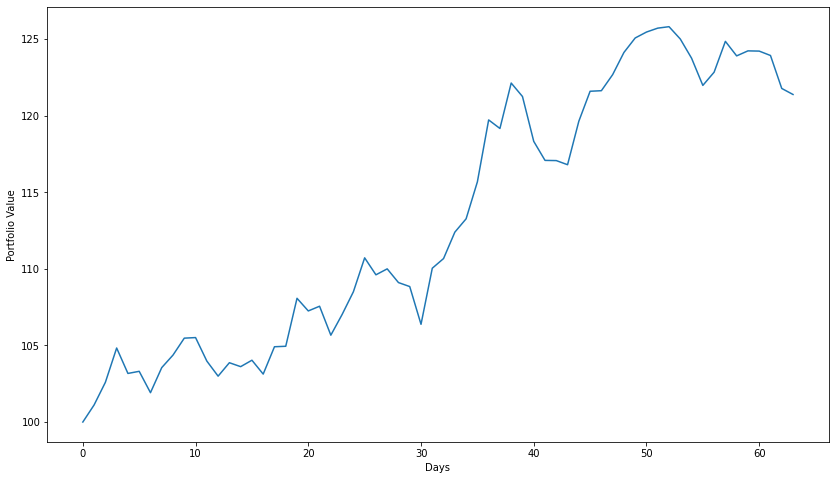

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(path)
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.show()

__many simulations / path__

In [ ]:
sims=1000
days=63

In [ ]:
ret=np.random.normal(loc=mean,scale=std,size=sims*days).reshape(sims,days)
ret

array([[-0.00269097, -0.02107305,  0.00289035, ...,  0.00208224,
         0.00520665,  0.00080155],
       [ 0.01200067, -0.01536915, -0.00639615, ...,  0.01500851,
        -0.02006711, -0.01862268],
       [ 0.00995574, -0.02108481,  0.01353566, ...,  0.00104646,
         0.02508708, -0.0069854 ],
       ...,
       [-0.00373135,  0.0137343 ,  0.0024246 , ...,  0.0034457 ,
         0.02517378,  0.0018777 ],
       [-0.00799177, -0.01705696, -0.01807466, ...,  0.01547224,
         0.00509557, -0.01366194],
       [ 0.00241576,  0.01017513,  0.02565684, ..., -0.01789882,
        -0.00177018, -0.0162157 ]])

In [ ]:
paths=(1+ret).cumprod(axis=1)*I0
paths

array([[ 99.73090346,  97.62926895,  97.91145162, ..., 107.0116279 ,
        107.56879975, 107.6550214 ],
       [101.20006663,  99.64470778,  99.00736537, ...,  93.95150908,
         92.06617385,  90.35165484],
       [100.99557373,  98.86610172, 100.2043199 , ...,  93.0993829 ,
         95.43497452,  94.76832291],
       ...,
       [ 99.62686494, 100.99516978, 101.24004257, ..., 103.93068727,
        106.54701594, 106.74707928],
       [ 99.2008234 ,  97.50875879,  95.74632143, ..., 105.17889564,
        105.71484214, 104.27057206],
       [100.24157647, 101.26154732, 103.85959816, ...,  95.8348546 ,
         95.66520984,  94.11393185]])

In [ ]:
paths=np.hstack((np.ones(sims).reshape(sims, 1)*100,paths))
paths   

array([[100.        ,  99.73090346,  97.62926895, ..., 107.0116279 ,
        107.56879975, 107.6550214 ],
       [100.        , 101.20006663,  99.64470778, ...,  93.95150908,
         92.06617385,  90.35165484],
       [100.        , 100.99557373,  98.86610172, ...,  93.0993829 ,
         95.43497452,  94.76832291],
       ...,
       [100.        ,  99.62686494, 100.99516978, ..., 103.93068727,
        106.54701594, 106.74707928],
       [100.        ,  99.2008234 ,  97.50875879, ..., 105.17889564,
        105.71484214, 104.27057206],
       [100.        , 100.24157647, 101.26154732, ...,  95.8348546 ,
         95.66520984,  94.11393185]])

In [ ]:
def path_simul_param(daily_returns, days, I0, sims = 10000, seed = 123):
  mean=daily_returns.mean()
  std=daily_returns.std()
  days=int(days)
  ret=np.random.normal(loc=mean,scale=std,size=sims*days).reshape(sims,days)
  paths=(1+ret).cumprod(axis=1)*I0
  paths=np.hstack((np.repeat(I0,sims).reshape(sims,1),paths))
  return paths



In [ ]:
paths=path_simul_param(daily_returns = returns, days =  63, I0 = 100)

Text(0.5, 1.0, 'Monte Carlo Simiulation Parametric')

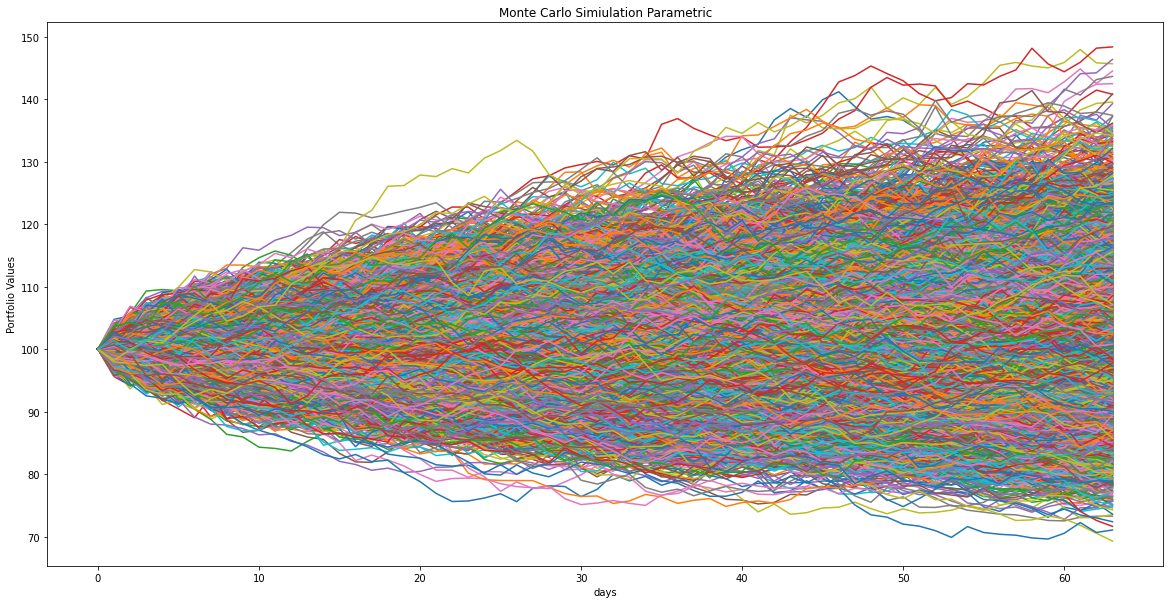

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(paths.T);
plt.xlabel("days")
plt.ylabel("Portfolio Values")
plt.title('Monte Carlo Simiulation Parametric')

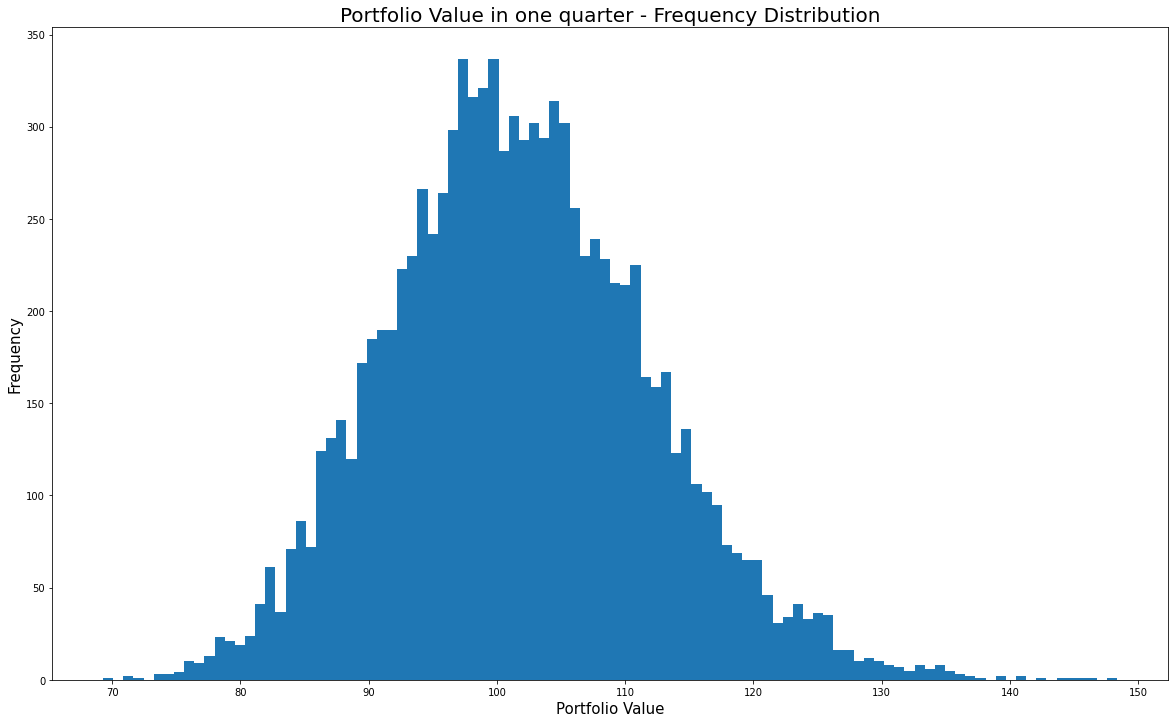

In [ ]:
plt.figure(figsize = (20, 12))
plt.hist(paths[:, -1], bins = 100)
plt.title("Portfolio Value in one quarter - Frequency Distribution", fontsize = 20)
plt.xlabel("Portfolio Value", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

In [ ]:
final_p=paths[:,-1]

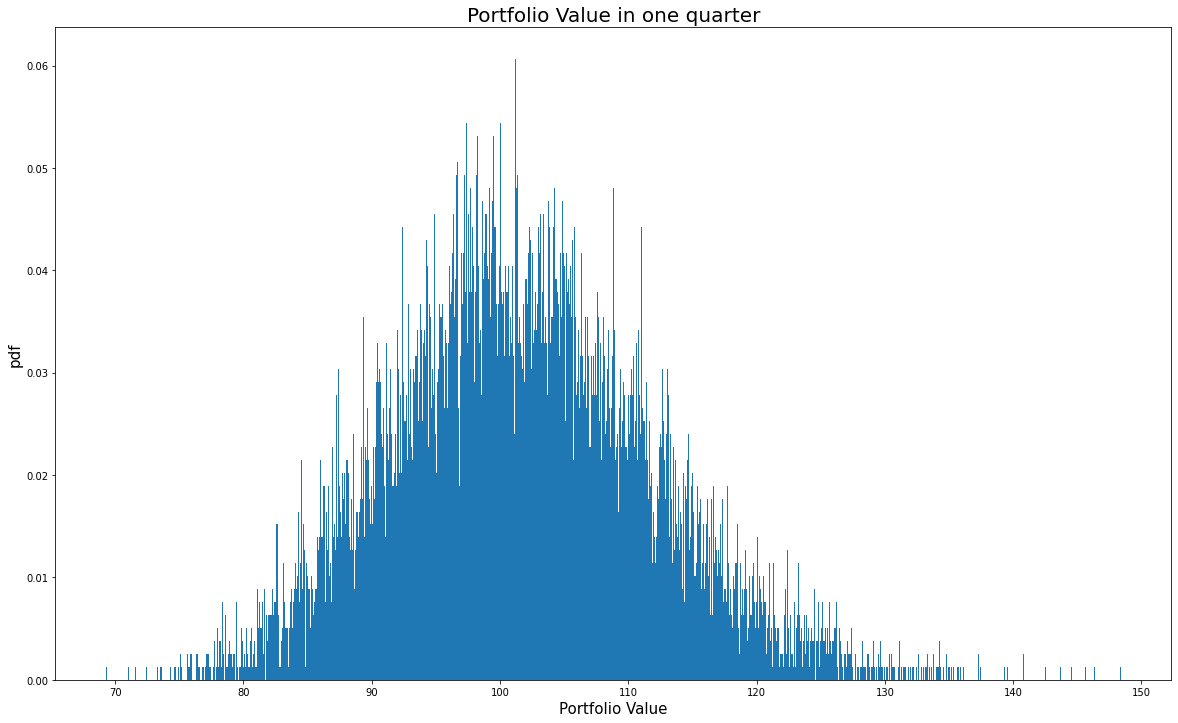

In [ ]:
plt.figure(figsize = (20, 12))
plt.hist(final_p,bins=1000,density=True)
plt.title("Portfolio Value in one quarter", fontsize = 20)
plt.xlabel("Portfolio Value", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.show()

In [ ]:
final_p.mean()

101.73529117843586

__1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter__

In [ ]:
def var_param(daily_returns, days, prob, I0, sims = 10000, seed = 123):
  mean=daily_returns.mean()
  std=daily_returns.std()
  ret=np.random.normal(loc=mean,scale=std,size=days*sims).reshape(sims,days)
  final=(1+ret).prod(axis=1)*I0
  VaR=np.percentile(final,prob)-I0
  return VaR

In [ ]:
(1+ret)

array([[0.99730903, 0.97892695, 1.00289035, ..., 1.00208224, 1.00520665,
        1.00080155],
       [1.01200067, 0.98463085, 0.99360385, ..., 1.01500851, 0.97993289,
        0.98137732],
       [1.00995574, 0.97891519, 1.01353566, ..., 1.00104646, 1.02508708,
        0.9930146 ],
       ...,
       [0.99626865, 1.0137343 , 1.0024246 , ..., 1.0034457 , 1.02517378,
        1.0018777 ],
       [0.99200823, 0.98294304, 0.98192534, ..., 1.01547224, 1.00509557,
        0.98633806],
       [1.00241576, 1.01017513, 1.02565684, ..., 0.98210118, 0.99822982,
        0.9837843 ]])

In [ ]:
var_param(returns, days = 1, prob = 1, I0 = 1000000, sims = 1000000)

-28867.708412216045

In [ ]:
var_p1= []
for i in range(1, 252+1):
    var_p1.append(-var_param(returns, days = i, prob = 1, I0 = 1000000))


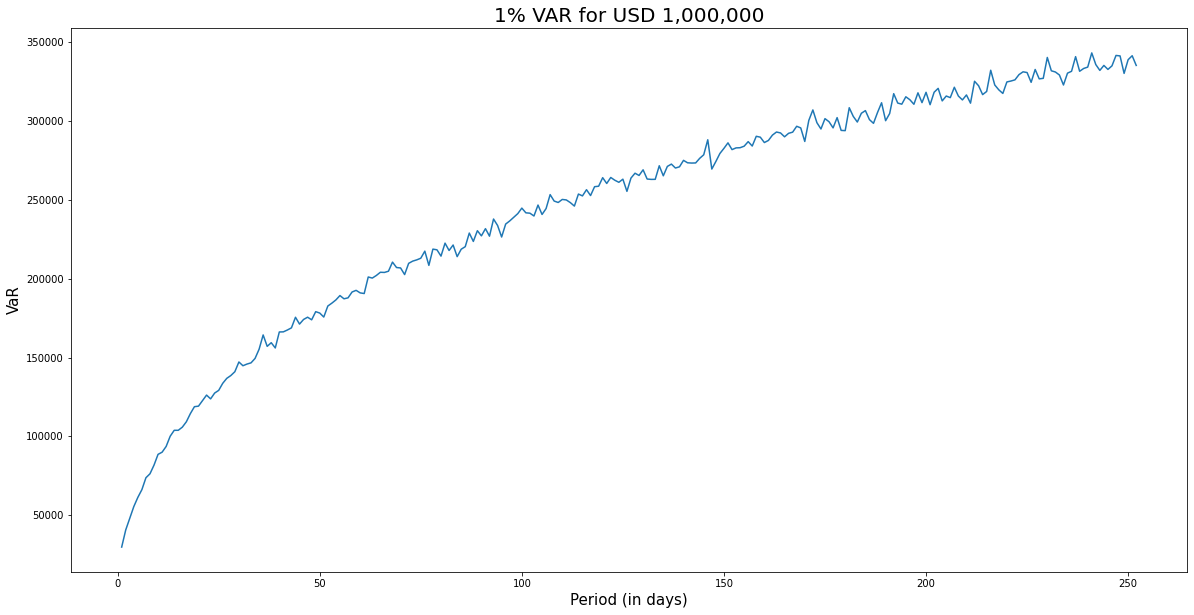

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(range(1,253),var_p1)
plt.title("1% VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Period (in days)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.show()

In [ ]:
var_p2= []
for i in np.linspace(0.1,5,100):
    var_p2.append(-var_param(returns, days = 63, prob = i, I0 = 1000000))


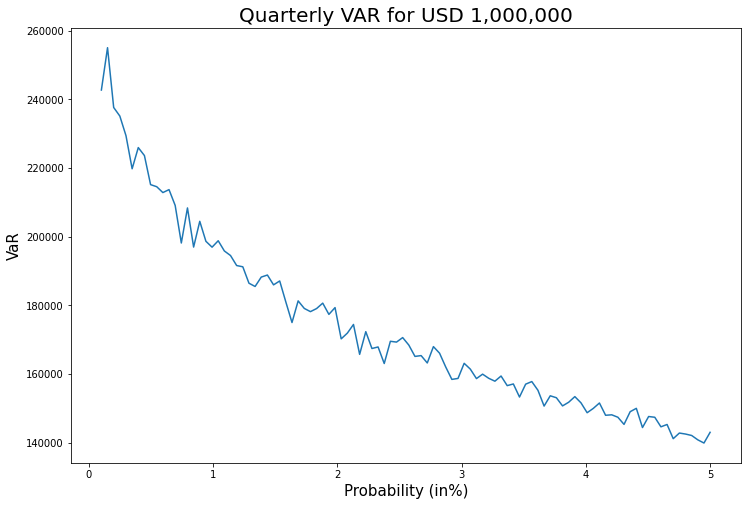

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(np.linspace(0.1, 5, 100),var_p2)
plt.title("1% VAR for USD 1,000,000")
plt.title("Quarterly VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Probability (in%)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.show()

### Monte Carlo Simulation - Bootstrapping Method (Part 1)

The Investment Fund ABC currently has a __1,000,000 USD__ position in the __S&P 500 Index__. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on __historical data__ (and forecasts).<br><br>Simulate the __minimum loss__ over a __period of one quarter__ that will occur with __1%__ probability: __1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter (63 business days)__. Use the __bootstrapping method__.

In [ ]:
def path_simul_bootstr(daily_returns, days, I0, sims = 10000, seed = 123):
    
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.choice(daily_returns.flatten(), size = days * sims, replace = True).reshape(sims, days)
    
    paths = (ret + 1).cumprod(axis = 1) * I0
    paths = np.hstack((np.ones(sims).reshape(sims, 1) * I0, paths))
    
    return paths

In [ ]:
I0 = 100
sims = 10000
days = 63

In [ ]:
paths = path_simul_bootstr(returns, days = days, I0 = I0, sims = sims)
paths

array([[100.        , 100.28533268,  99.87679018, ..., 108.25051467,
        109.20665166, 113.47211539],
       [100.        , 100.80770048,  99.47150053, ..., 107.61290611,
        107.49968047, 106.34884959],
       [100.        , 100.99407798,  99.54243691, ..., 107.87686473,
        106.77011617, 108.04307959],
       ...,
       [100.        , 100.04172002, 100.99558634, ..., 102.74032529,
        100.55961938,  97.90248092],
       [100.        ,  99.8313247 , 100.02585626, ..., 106.1641122 ,
        106.78216524, 107.11696379],
       [100.        , 100.69561281, 100.34342626, ..., 110.47689161,
        116.81023249, 114.7579023 ]])

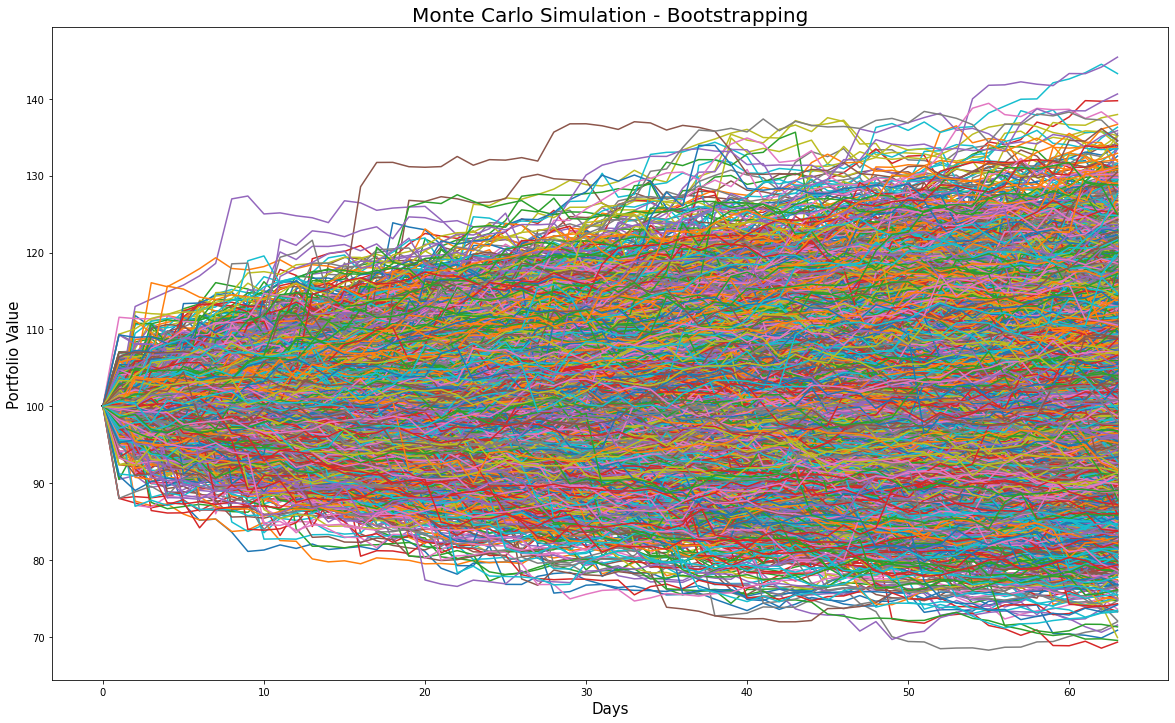

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(paths.T)
plt.ylabel("Portfolio Value", fontsize = 15)
plt.xlabel("Days", fontsize = 15 )
plt.title("Monte Carlo Simulation - Bootstrapping", fontsize = 20)
plt.show()

In [ ]:
final_b = paths[:, -1]

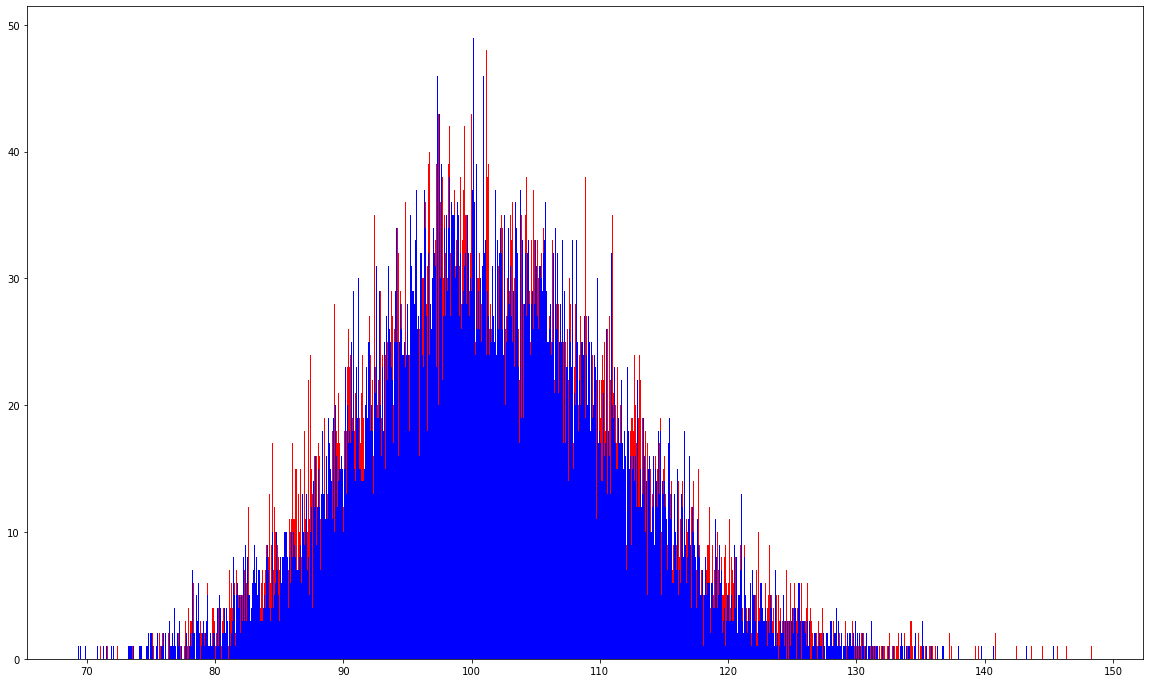

In [ ]:
plt.figure(figsize=(20,12))
plt.hist(final_p,color="r",bins=1000)
plt.hist(final_b,color='b',bins=1000)
plt.show()

__1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter__

In [ ]:
def VaR_Bootstrap(daily_returns,days=63,I0=100000,sims=1000,proba=0.01):

  ret=np.random.choice(daily_returns.flatten(),size=sims*days).reshape(sims,days)
  paths=(1+ret).prod(axis=1)*I0
  var=np.percentile(paths,proba)-I0

  return var

In [ ]:
VaR_Bootstrap(returns, days = 63, proba= 1, I0 = 1000000, sims = 1000000)

-203247.73188210756

In [ ]:
var_b1= []
for i in range(1, 252+1):
    var_b1.append(-VaR_Bootstrap(returns, days = i, proba = 1, I0 = 1000000))

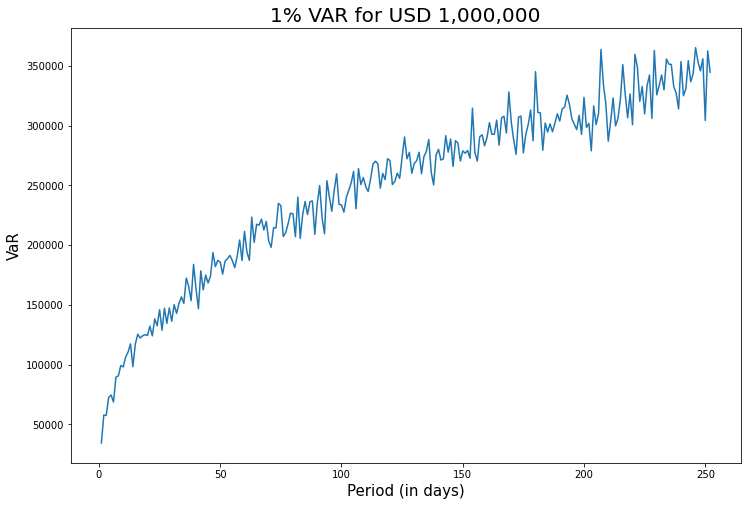

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 252+1), var_b1)
plt.title("1% VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Period (in days)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.show()

In [ ]:
var_b2= []
for i in np.linspace(0.1, 5, 100):
    var_b2.append(-VaR_Bootstrap(returns, days = 63, proba = i, I0 = 1000000))

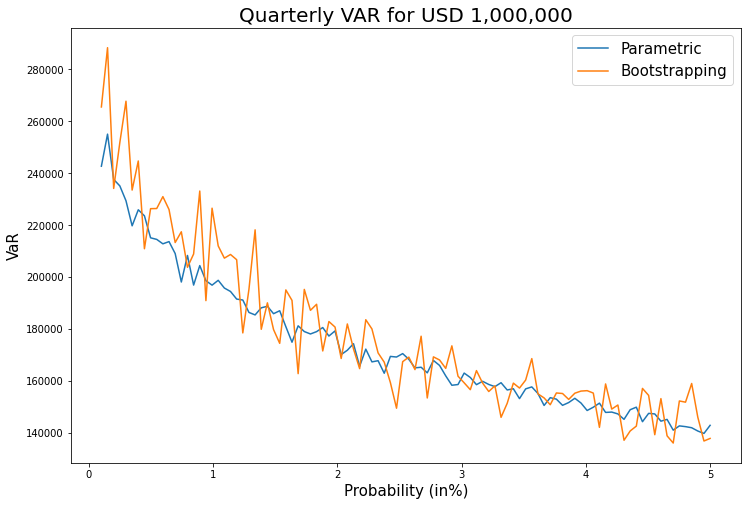

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(np.linspace(0.1, 5, 100),var_p2, label = "Parametric")
plt.plot(np.linspace(0.1, 5, 100),var_b2, label = "Bootstrapping")
plt.title("1% VAR for USD 1,000,000")
plt.title("Quarterly VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Probability (in%)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### Dynamic & path-dependent Simulations (Part 1)

John (65) recently retired. He owns liquid assets worth __625,000 USD__ to cover life expenses during retirement. John´s bank offers to pay a fixed (guaranteed) monthly annuity of 2,635 USD for the next 30 years. 
Alternatively, John evaluates a diversified Investment Portfolio with an expected long-term __return of 6% per month__ with a monthly __standard deviation of 2.5%__ (assume normality). John plans to withdraw __2,800 USD per month__. 

Simulate/Calculate the __risk of outliving his assets__ prior to his 95th birthday (longevity risk). 

Formulate and simulate an appropriate __path-dependent strategy__ that 1) __lowers longevity risk to 10%__ or less, and, at the same time 2) __further increases expected income__.

__Alt 1: The Annuity Offer (Bank)__

In [ ]:
n = 30
m = 12
r = 0.03
pv = 625000

In [ ]:
np.pmt(rate=r/12,nper=n*m,pv=pv)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  """Entry point for launching an IPython kernel.


-2635.0252108090995

__Alt 2: The Investment Portfolio__

In [ ]:
mean=0.06/12
std=0.025
annuity=2800

In [ ]:
#simulate an n*m normal sample which is the returns of the pf the substrict the annuity from each  return 
np.random.seed(123)
rets = np.random.normal(loc = mean, scale = std, size = n*m)  

value_list = [pv]
for i in range(n*m):
    value = max(0, value_list[i] * (1 + rets[i])-annuity)

    value_list.append(value)

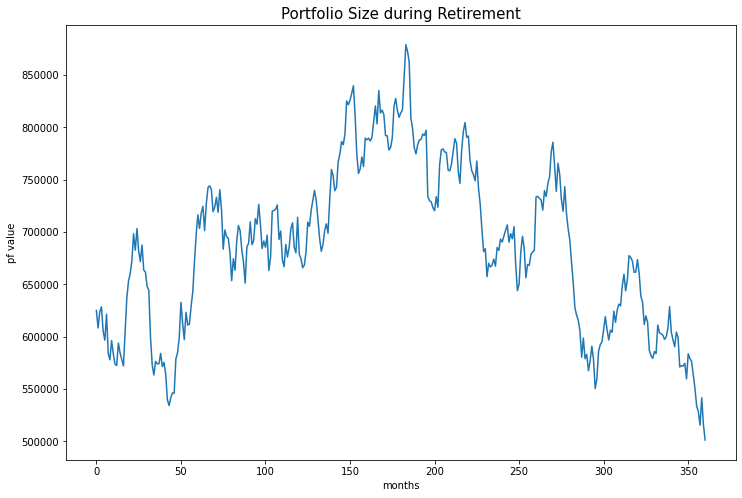

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(value_list)
plt.title("Portfolio Size during Retirement", fontsize = 15)
plt.xlabel("months")
plt.ylabel("pf value")
plt.show()

In [ ]:
#lets run many simulation :
sims=20

In [ ]:
sims_array=np.zeros(sims*(n*m+1)).reshape(sims,n*m+1)
sims_array.shape

(20, 361)

In [ ]:
for sim in range(sims) :
  ret=np.random.normal(loc=mean,scale=std,size=n*m)
  value_list=[pv]

  for i in range(n*m) :
    value=max(0,value_list[i]*(ret[i] + 1)-annuity)
    value_list.append(value)

  sims_array[sim,:]=value_list
  



In [ ]:
sims_array

array([[ 625000.        ,  619052.89955536,  629771.33226644, ...,
         904732.26099098,  913270.60281565,  918573.86701779],
       [ 625000.        ,  638982.49701813,  645916.67690307, ...,
              0.        ,       0.        ,       0.        ],
       [ 625000.        ,  627825.93426245,  625371.04053629, ...,
        1662404.39961981, 1657347.67787018, 1633793.53791609],
       ...,
       [ 625000.        ,  633276.44032928,  627507.39769892, ...,
        1991379.94566031, 1970268.41465002, 1986025.01795846],
       [ 625000.        ,  633137.34385796,  625291.69597196, ...,
         341427.98225364,  345886.04446241,  343429.66637376],
       [ 625000.        ,  610611.08302112,  626719.33652389, ...,
        2050131.20132309, 2227319.1177382 , 2273509.76995939]])

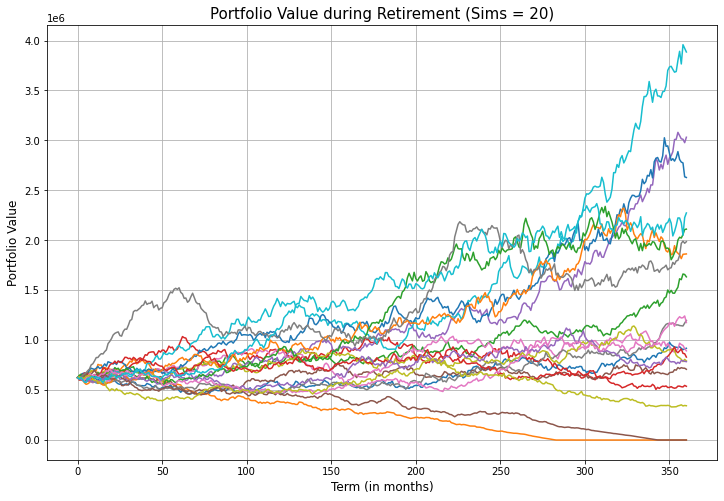

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(sims_array.T)
plt.grid()
plt.title("Portfolio Value during Retirement (Sims = {})".format(sims), fontsize = 15)
plt.ylabel("Portfolio Value", fontsize = 12)
plt.xlabel("Term (in months)", fontsize = 12)
plt.show()

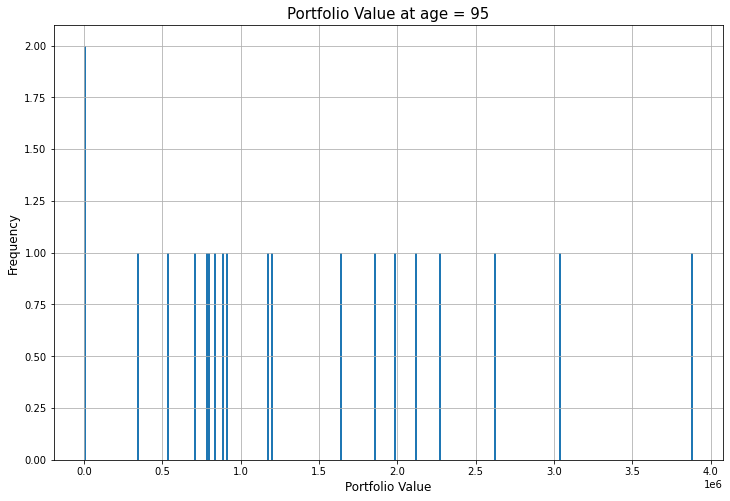

In [ ]:
plt.figure(figsize = (12, 8))
plt.hist(sims_array[:,-1],bins=300)
plt.grid()
plt.title("Portfolio Value at age = 95", fontsize = 15)
plt.xlabel("Portfolio Value", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.show()

In [ ]:
#calculate the average of loss in our pf 
def outliving_risk(assets, nper, annuity, mean_ret, std, sims = 10000, seed = 123):
    
    sims_array = np.empty(sims * (nper + 1)).reshape(sims, nper + 1)
    withdrawels = []
    np.random.seed(seed)
    
    for sim in range(sims):
        rets = np.random.normal(loc = mean_ret, scale = std, size = nper)    
        value_list = [assets]
    
        for i in range(nper):
            withdrawel = min(value_list[i] * (1 + rets[i]), annuity)
            withdrawels.append(withdrawel)
            value = value_list[i] * (1 + rets[i]) - withdrawel
            value_list.append(value)
    
        sims_array[sim, :] = value_list
    
    return (sims_array[:, -1] == 0).sum() / sims, np.mean(withdrawels)

In [ ]:
outliving_risk(assets = pv, nper = n*m, annuity = 2800, mean_ret = mean, std = std, sims = 10000)

(0.1414, 2729.9681830107493)

In [ ]:
# for many value of annuity :
annuities=np.arange(2400,3400,10)
annuities

array([2400, 2410, 2420, 2430, 2440, 2450, 2460, 2470, 2480, 2490, 2500,
       2510, 2520, 2530, 2540, 2550, 2560, 2570, 2580, 2590, 2600, 2610,
       2620, 2630, 2640, 2650, 2660, 2670, 2680, 2690, 2700, 2710, 2720,
       2730, 2740, 2750, 2760, 2770, 2780, 2790, 2800, 2810, 2820, 2830,
       2840, 2850, 2860, 2870, 2880, 2890, 2900, 2910, 2920, 2930, 2940,
       2950, 2960, 2970, 2980, 2990, 3000, 3010, 3020, 3030, 3040, 3050,
       3060, 3070, 3080, 3090, 3100, 3110, 3120, 3130, 3140, 3150, 3160,
       3170, 3180, 3190, 3200, 3210, 3220, 3230, 3240, 3250, 3260, 3270,
       3280, 3290, 3300, 3310, 3320, 3330, 3340, 3350, 3360, 3370, 3380,
       3390])

In [ ]:
risks=[]
for i in annuities :
  risk=outliving_risk(assets = pv, nper = n*m, annuity = i, mean_ret = mean, std = std, sims = 10000)[0]
  risks.append(risk)

ValueError: ignored

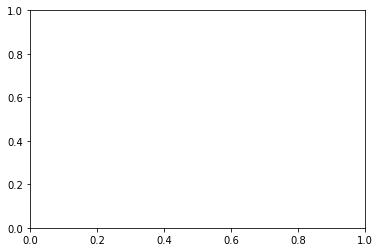

In [ ]:
plt.plot(annuities,risk)